In [7]:
pip install pandas numpy scikit-learn tensorflow xgboost imbalanced-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python\python311\lib\site-packages\ember-0.1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd

# Load dataset (adjust path as needed)
df = pd.read_csv('C:/Users/nazih/OneDrive/Desktop/THESIS CODE/data.csv')
print(df.head())
print(df['Class'].value_counts())  # Check class distribution

  Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
0   Benign            45            17           10.555556   
1   Benign            47            19           11.531915   
2   Benign            40            14           14.725000   
3   Benign            32            13           13.500000   
4   Benign            42            16           11.452381   

   pslist.nprocs64bit  pslist.avg_handlers  dlllist.ndlls  \
0                   0           202.844444           1694   
1                   0           242.234043           2074   
2                   0           288.225000           1932   
3                   0           264.281250           1445   
4                   0           281.333333           2067   

   dlllist.avg_dlls_per_proc  handles.nhandles  handles.avg_handles_per_proc  \
0                  38.500000              9129                    212.302326   
1                  44.127660             11385                    242.234043   
2                  4

In [9]:
df.tail(5)

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
58591,Ransomware-Shade-fa03be3078d1b9840f06745f160eb...,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,...,221,26,24,116,0,120,86,0,8,Malware
58592,Ransomware-Shade-f56687137caf9a67678cde91e4614...,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,...,221,26,24,116,0,116,88,0,8,Malware
58593,Ransomware-Shade-faddeea111a25da4d0888f3044ae9...,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,...,221,26,24,116,0,120,88,0,8,Malware
58594,Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,...,221,26,24,116,0,120,87,0,8,Malware
58595,Ransomware-Shade-955d9af38346c1755527bd196668e...,38,15,9.868421,0,213.026316,1487,39.131579,8095,213.026316,...,221,26,24,116,0,120,86,0,8,Malware


In [10]:
# Split the category to capture the second word, which signifies the category name
def category_name(column):
    return column.split("-")[1] if "-" in column else column

In [11]:
# Creating a column with the names of the variants
df["category_name"] = df["Category"].apply(category_name)
df["category_name"].value_counts()

category_name
Benign          29298
Transponder      2410
Gator            2200
Shade            2128
Ako              2000
180solutions     2000
CWS              2000
Refroso          2000
Scar             2000
Conti            1988
Emotet           1967
Maze             1958
Zeus             1950
Pysa             1717
Reconyc          1570
TIBS             1410
Name: count, dtype: int64

In [13]:
X = df.drop(['category_name', 'Category','Class'], axis=1)  # Features
y = df['category_name']  # Labels

In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("Encoded labels:", label_encoder.classes_)

Encoded labels: ['180solutions' 'Ako' 'Benign' 'CWS' 'Conti' 'Emotet' 'Gator' 'Maze'
 'Pysa' 'Reconyc' 'Refroso' 'Scar' 'Shade' 'TIBS' 'Transponder' 'Zeus']


In [15]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Input layer + first hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(16, activation='softmax')  # Output layer (16 classes)
])

c:\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,192 (24.19 KB)

 Trainable params: 6,192 (24.19 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    verbose=1)

Epoch 1/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4884 - loss: 1.6567 - val_accuracy: 0.5944 - val_loss: 1.2317
Epoch 2/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5957 - loss: 1.2337 - val_accuracy: 0.6038 - val_loss: 1.1996
Epoch 3/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6048 - loss: 1.1952 - val_accuracy: 0.6123 - val_loss: 1.1653
Epoch 4/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6139 - loss: 1.1666 - val_accuracy: 0.6197 - val_loss: 1.1518
Epoch 5/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6144 - loss: 1.1555 - val_accuracy: 0.6184 - val_loss: 1.1431
Epoch 6/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6238 - loss: 1.1355 - val_accuracy: 0.6244 - val_loss: 1.1304
Epoch 7/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6228 - loss: 1.1278 - val_accuracy: 0.6313 - val_loss: 1.1188
Epoch 8/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6267 - loss: 1.1189 - 

In [21]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.6598


In [22]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Get the class with the highest probability

# Decode the predictions
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)
y_test_labels = label_encoder.inverse_transform(y_test)

# Print a few predictions
for i in range(5):
    print(f"Predicted: {y_pred_labels[i]}, Actual: {y_test_labels[i]}")

367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
Predicted: Conti, Actual: Conti
Predicted: Benign, Actual: Benign
Predicted: Maze, Actual: CWS
Predicted: Benign, Actual: Benign
Predicted: Conti, Actual: Shade


In [23]:
from sklearn.metrics import classification_report

# Classification report
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

180solutions       0.45      0.11      0.17       442
         Ako       0.36      0.14      0.20       389
      Benign       1.00      1.00      1.00      5790
         CWS       0.31      0.14      0.20       401
       Conti       0.24      0.23      0.23       408
      Emotet       0.27      0.37      0.31       375
       Gator       0.43      0.51      0.47       424
        Maze       0.37      0.24      0.29       401
        Pysa       0.24      0.18      0.20       349
     Reconyc       0.31      0.45      0.37       334
     Refroso       0.39      0.59      0.47       437
        Scar       0.28      0.29      0.28       393
       Shade       0.27      0.36      0.31       404
        TIBS       0.61      0.54      0.57       280
 Transponder       0.27      0.42      0.33       483
        Zeus       0.32      0.38      0.35       410

    accuracy                           0.66     11720
   macro avg       0.38   

In [24]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, class_weight=class_weight_dict)

Epoch 1/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6648 - loss: 1.8773 - val_accuracy: 0.6638 - val_loss: 1.0266
Epoch 2/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6756 - loss: 1.8241 - val_accuracy: 0.6727 - val_loss: 0.9976
Epoch 3/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6766 - loss: 1.8192 - val_accuracy: 0.6658 - val_loss: 1.0115
Epoch 4/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6775 - loss: 1.8171 - val_accuracy: 0.6656 - val_loss: 1.0071
Epoch 5/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6767 - loss: 1.8101 - val_accuracy: 0.6693 - val_loss: 1.0001
Epoch 6/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6752 - loss: 1.8402 - val_accuracy: 0.6693 - val_loss: 1.0012
Epoch 7/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6791 - loss: 1.8054 - val_accuracy: 0.6692 - val_loss: 1.0063
Epoch 8/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6833 - loss: 1.7903 - 

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.6850


In [35]:
pip install --upgrade scikit-learn imblearn

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python\python311\lib\site-packages\ember-0.1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import sklearn
print(sklearn.__version__)

In [16]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


mal_mem_df = pd.read_csv('data.csv')


# Converting data types
mal_mem_df["Class"] = mal_mem_df["Class"].astype("category")

# Split the category to capture the first word, which signifies the category type
def category(column):
    return column.split("-")[0] if "-" in column else column





# Remove all but the first occurrence
df = mal_mem_df.copy()
df = df.drop_duplicates()
print(f"Rows removed: {len(mal_mem_df) - len(df)}")

# Creating a column with the names of the variants
df["category_name"] = df["Category"].apply(category_name)
df["category_name"].value_counts()

# Split the category to capture the second word, which signifies the category name
def category_name(column):
    return column.split("-")[1] if "-" in column else column


# Drop rows where the category_name is 'Benign'
df = df[df['category_name'] != 'Benign']

# Verify if 'Benign' class has been removed
print(f"Remaining category names in the dataset:\n{df['category_name'].value_counts()}")

# Drop the Category and Class columns
df.drop(["Category", "Class"], axis=1, inplace=True)

# Separate features and target
X = df.drop("category_name", axis=1)
y = df["category_name"]
X.tail(5)



Rows removed: 534
Remaining category names in the dataset:
category_name
Transponder     2410
Shade           2128
Ako             2000
180solutions    2000
CWS             2000
Refroso         2000
Scar            2000
Gator           1995
Conti           1988
Emotet          1967
Zeus            1950
Maze            1754
Pysa            1659
Reconyc         1570
TIBS            1410
Name: count, dtype: int64


,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
58591,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,0,...,389,221,26,24,116,0,120,86,0,8
58592,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,0,...,389,221,26,24,116,0,116,88,0,8
58593,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,0,...,389,221,26,24,116,0,120,88,0,8
58594,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,0,...,389,221,26,24,116,0,120,87,0,8
58595,38,15,9.868421,0,213.026316,1487,39.131579,8095,213.026316,0,...,389,221,26,24,116,0,120,86,0,8


Epoch 1/50


c:\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


577/577 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1163 - loss: 2.6596 - val_accuracy: 0.1743 - val_loss: 2.4773
Epoch 2/50
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1612 - loss: 2.5005 - val_accuracy: 0.1940 - val_loss: 2.4279
Epoch 3/50
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1895 - loss: 2.4577 - val_accuracy: 0.2207 - val_loss: 2.3704
Epoch 4/50
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2039 - loss: 2.3883 - val_accuracy: 0.2395 - val_loss: 2.3195
Epoch 5/50
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2209 - loss: 2.3570 - val_accuracy: 0.2447 - val_loss: 2.2856
Epoch 6/50
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2339 - loss: 2.3262 - val_accuracy: 0.2517 - val_loss: 2.2672
Epoch 7/50
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2344 - loss: 2.2962 - val_accuracy: 0.2656 - val_loss: 2.2400
Epoch 8/50
577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2428 - loss: 2.2760 - val_accuracy: 0.2775 - val_

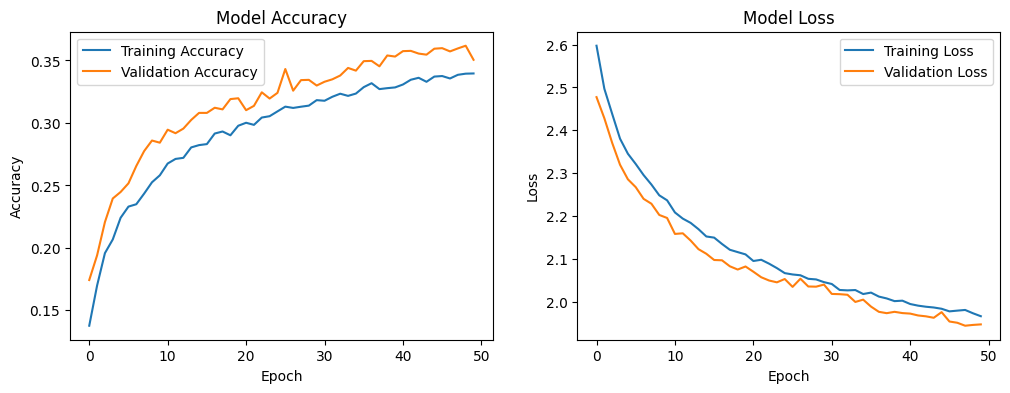

In [17]:

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Apply the same scaling to test set

# Encode labels to integers and one-hot encode for Keras
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(y_train_categorical.shape[1], activation='softmax')  # Output layer for 4 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_categorical,  # Use resampled data
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# Predict and evaluate
y_pred_proba = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1)
y_test_decoded = np.argmax(y_test_categorical, axis=1)
accuracy = accuracy_score(y_test_decoded, y_pred)
print(f"Accuracy of Deep Learning Model: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred, target_names=label_encoder.classes_))

# Plot training history (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('data.csv')

# Converting data types
df["Class"] = df["Class"].astype("category")

# Split the category to capture the first word (category type) and second word (category name)
def category(column):
    return column.split("-")[0] if "-" in column else column

def category_name(column):
    return column.split("-")[1] if "-" in column else column

# Creating a column with the names of the variants
df["category_name"] = df["Category"].apply(category_name)
df["category_name"].value_counts()

# Create category name column
df["category_name"] = df["Category"].apply(category_name)

df = df.drop_duplicates()
print(f"Rows removed: {len(mal_mem_df) - len(df)}")

# Verify all category names (should be 15 unique classes)
print(f"Unique category names in the dataset:\n{df['category_name'].value_counts()}")

# Drop the Category and Class columns
df.drop(["Category", "Class"], axis=1, inplace=True)

# Separate features and target
X = df.drop("category_name", axis=1)
y = df["category_name"]





Rows removed: 534
Unique category names in the dataset:
category_name
Benign          29231
Transponder      2410
Shade            2128
Ako              2000
180solutions     2000
CWS              2000
Refroso          2000
Scar             2000
Gator            1995
Conti            1988
Emotet           1967
Zeus             1950
Maze             1754
Pysa             1659
Reconyc          1570
TIBS             1410
Name: count, dtype: int64


In [17]:
from imblearn.over_sampling import ADASYN
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)
print(f"Number of classes: {num_classes}")  # Should be 15

# Apply ADASYN to balance all classes
adasyn = ADASYN(random_state=42)  # n_jobs=-1 uses all available CPU cores
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train_encoded)

# Convert back to DataFrame for verification
X_resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_train_resampled)
print(f"Resampled class distribution:\n{y_resampled_df.value_counts()}")

# Scale the features (fit on original X_train, transform resampled and test data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on original training data
X_train_resampled_scaled = scaler.transform(X_train_resampled)  # Apply to resampled data
X_test_scaled = scaler.transform(X_test)  # Apply to test data

# Convert labels to categorical
y_train_categorical = to_categorical(y_train_resampled, num_classes=num_classes)
y_test_categorical = to_categorical(y_test_encoded, num_classes=num_classes)

# Build the model (adjusted for 15 classes)
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')  # 15 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_resampled_scaled, y_train_categorical,
                    epochs=100,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

# Predict and evaluate
y_pred_proba = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1)
y_test_decoded = np.argmax(y_test_categorical, axis=1)
accuracy = accuracy_score(y_test_decoded, y_pred)
print(f"Accuracy of Deep Learning Model: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred, target_names=label_encoder.classes_))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Number of classes: 16
Resampled class distribution:
15    23816
1     23640
13    23576
6     23512
7     23485
9     23391
2     23385
12    23270
8     23213
10    23212
5     23202
3     23155
11    23153
0     23078
4     23074
14    22976
Name: count, dtype: int64


c:\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
4665/4665 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.2214 - loss: 2.2812 - val_accuracy: 0.0080 - val_loss: 4.9681
Epoch 2/100
4665/4665 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.2878 - loss: 2.0308 - val_accuracy: 0.0194 - val_loss: 4.7834
Epoch 3/100
4665/4665 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.3081 - loss: 1.9651 - val_accuracy: 0.0062 - val_loss: 4.8212
Epoch 4/100
4665/4665 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.3234 - loss: 1.9270 - val_accuracy: 0.0059 - val_loss: 4.6220
Epoch 5/100
4665/4665 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.3342 - loss: 1.8987 - val_accuracy: 0.0035 - val_loss: 4.5229
Epoch 6/100
4665/4665 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.3420 - loss: 1.8813 - val_accuracy: 0.0124 - val_loss: 4.3983
Epoch 7/100
4665/4665 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.3474 - loss: 1.8609 - val_accuracy: 0.0149 - val_loss: 4.5738
Epoch 8/100
4665/4665 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.3515 -

KeyboardInterrupt: 

Rows removed: 534
Unique category names in the dataset:
category_name
Benign          29231
Transponder      2410
Shade            2128
Ako              2000
180solutions     2000
CWS              2000
Refroso          2000
Scar             2000
Gator            1995
Conti            1988
Emotet           1967
Zeus             1950
Maze             1754
Pysa             1659
Reconyc          1570
TIBS             1410
Name: count, dtype: int64
Number of classes: 16
Resampled class distribution:
15    23816
1     23640
13    23576
6     23512
7     23485
9     23391
2     23385
12    23270
8     23213
10    23212
5     23202
3     23155
11    23153
0     23078
4     23074
14    22976
Name: count, dtype: int64


c:\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.2149 - loss: 2.3196 - val_accuracy: 0.0016 - val_loss: 4.9669 - learning_rate: 0.0010
Epoch 2/150
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.2801 - loss: 2.0542 - val_accuracy: 0.0086 - val_loss: 4.8870 - learning_rate: 0.0010
Epoch 3/150
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.3097 - loss: 1.9680 - val_accuracy: 0.0203 - val_loss: 4.6743 - learning_rate: 0.0010
Epoch 4/150
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.3251 - loss: 1.9201 - val_accuracy: 0.0167 - val_loss: 4.6312 - learning_rate: 0.0010
Epoch 5/150
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.3375 - loss: 1.8854 - val_accuracy: 0.0049 - val_loss: 4.6783 - learning_rate: 0.0010
Epoch 6/150
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.3479 - loss: 1.8547 - val_accuracy: 0.0116 - val_loss: 4.7538 - learning_rate: 0.0010
Epoch 7/150
2333/2333 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accura

c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


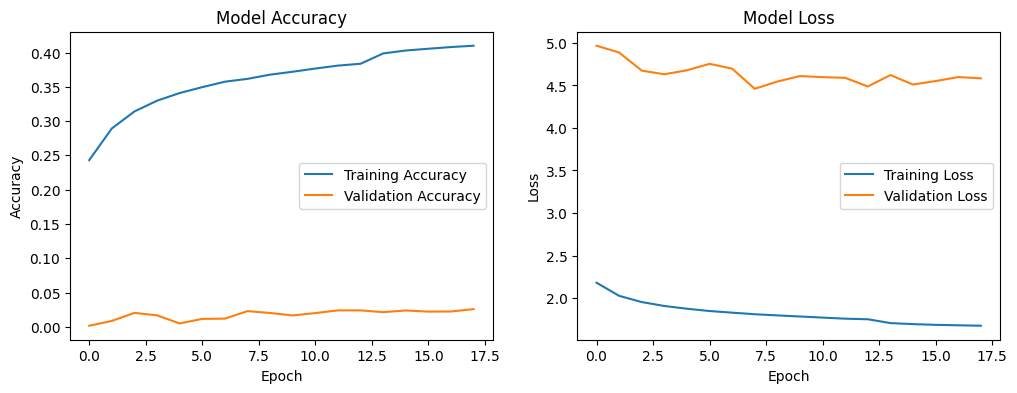

In [18]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import ADASYN
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Load data
mal_mem_df = pd.read_csv('data.csv')

# Converting data types
mal_mem_df["Class"] = mal_mem_df["Class"].astype("category")

# Split the category to capture the first word (category type) and second word (category name)
def category(column):
    return column.split("-")[0] if "-" in column else column

def category_name(column):
    return column.split("-")[1] if "-" in column else column

# Create category name column
mal_mem_df["category_name"] = mal_mem_df["Category"].apply(category_name)

# Remove duplicates
df = mal_mem_df.copy()
df = df.drop_duplicates()
print(f"Rows removed: {len(mal_mem_df) - len(df)}")

# Verify all category names
print(f"Unique category names in the dataset:\n{df['category_name'].value_counts()}")

# Drop the Category and Class columns
df.drop(["Category", "Class"], axis=1, inplace=True)

# Separate features and target
X = df.drop("category_name", axis=1)
y = df["category_name"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)
print(f"Number of classes: {num_classes}")  # Should be 16

# Apply ADASYN to balance all classes with adjusted parameters
adasyn = ADASYN(random_state=42, n_neighbors=5)  # Adjusted n_neighbors for better synthesis
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train_encoded)

# Convert back to DataFrame for verification
X_resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_train_resampled)
print(f"Resampled class distribution:\n{y_resampled_df.value_counts()}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on original training data
X_train_resampled_scaled = scaler.transform(X_train_resampled)  # Apply to resampled data
X_test_scaled = scaler.transform(X_test)  # Apply to test data

# Convert labels to categorical
y_train_categorical = to_categorical(y_train_resampled, num_classes=num_classes)
y_test_categorical = to_categorical(y_test_encoded, num_classes=num_classes)

# Build a deeper model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')  # 16 classes
])

# Compile the model with a custom learning rate
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(X_train_resampled_scaled, y_train_categorical,
                    epochs=150,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr],
                    verbose=1)

# Predict and evaluate
y_pred_proba = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1)
y_test_decoded = np.argmax(y_test_categorical, axis=1)
accuracy = accuracy_score(y_test_decoded, y_pred)
print(f"Accuracy of Deep Learning Model: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred, target_names=label_encoder.classes_))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Rows removed: 534
Unique category names in the dataset:
category_name
Benign          29231
Transponder      2410
Shade            2128
Ako              2000
180solutions     2000
CWS              2000
Refroso          2000
Scar             2000
Gator            1995
Conti            1988
Emotet           1967
Zeus             1950
Maze             1754
Pysa             1659
Reconyc          1570
TIBS             1410
Name: count, dtype: int64
Number of classes: 16
Selected features: ['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads', 'pslist.avg_handlers', 'dlllist.ndlls', 'dlllist.avg_dlls_per_proc', 'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread', 'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer', 'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load', 'ldrmodules.not_in_init', 'ldrmodules.not_in_mem', 'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_mem_avg', 'malfind.ninjections', 'm

c:\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [ 3  9 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


X_train_resampled shape: (373757, 40)
y_train_resampled shape: (373757,)
Number of unique classes in y_train_resampled: 16
y_train_categorical shape: (373757, 16)
y_test_categorical shape: (11613, 16)


c:\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
2336/2336 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.2035 - loss: 2.3062 - val_accuracy: 0.0057 - val_loss: 4.5236 - learning_rate: 0.0010
Epoch 2/200
2336/2336 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2723 - loss: 2.0906 - val_accuracy: 0.0037 - val_loss: 4.7171 - learning_rate: 0.0010
Epoch 3/200
2336/2336 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2949 - loss: 2.0184 - val_accuracy: 0.0193 - val_loss: 4.5875 - learning_rate: 0.0010
Epoch 4/200
2336/2336 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3090 - loss: 1.9739 - val_accuracy: 0.0215 - val_loss: 4.5038 - learning_rate: 0.0010
Epoch 5/200
2336/2336 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3215 - loss: 1.9379 - val_accuracy: 0.0138 - val_loss: 4.4682 - learning_rate: 0.0010
Epoch 6/200
2336/2336 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3261 - loss: 1.9158 - val_accuracy: 0.0146 - val_loss: 4.4661 - learning_rate: 0.0010
Epoch 7/200
2336/2336 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3

c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


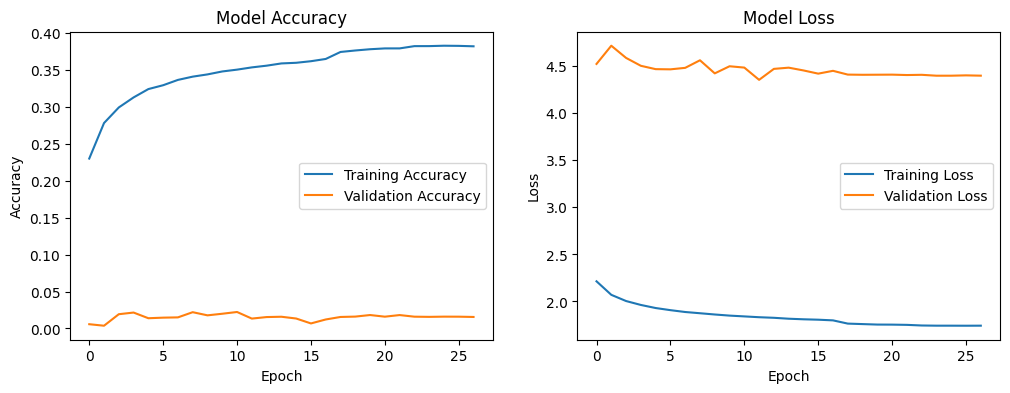

In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import ADASYN
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Load data
mal_mem_df = pd.read_csv('data.csv')

# Converting data types
mal_mem_df["Class"] = mal_mem_df["Class"].astype("category")

# Split the category to capture the first word (category type) and second word (category name)
def category(column):
    return column.split("-")[0] if "-" in column else column

def category_name(column):
    return column.split("-")[1] if "-" in column else column

# Create category name column
mal_mem_df["category_name"] = mal_mem_df["Category"].apply(category_name)

# Remove duplicates
df = mal_mem_df.copy()
df = df.drop_duplicates()
print(f"Rows removed: {len(mal_mem_df) - len(df)}")

# Verify all category names
print(f"Unique category names in the dataset:\n{df['category_name'].value_counts()}")

# Drop the Category and Class columns
df.drop(["Category", "Class"], axis=1, inplace=True)

# Separate features and target
X = df.drop("category_name", axis=1)
y = df["category_name"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Encode labels for feature selection
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)
print(f"Number of classes: {num_classes}")  # Should be 16

# Feature selection using SelectKBest
k = 40  # Increased k to retain more features
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train_encoded)
X_test_selected = selector.transform(X_test)

# Get selected feature names for reference
selected_features = X.columns[selector.get_support()].tolist()
print(f"Selected features: {selected_features}")

# Apply ADASYN to balance all classes with selected features
adasyn = ADASYN(random_state=42, n_neighbors=5)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_selected, y_train_encoded)

# Verify shapes and alignment
print(f"X_train_resampled shape: {X_train_resampled.shape}")
print(f"y_train_resampled shape: {y_train_resampled.shape}")
print(f"Number of unique classes in y_train_resampled: {len(np.unique(y_train_resampled))}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)  # Fit on selected training data
X_train_resampled_scaled = scaler.transform(X_train_resampled)  # Apply to resampled data
X_test_scaled = scaler.transform(X_test_selected)  # Apply to test data

# Convert labels to categorical with explicit check
y_train_categorical = to_categorical(y_train_resampled, num_classes=num_classes)
y_test_categorical = to_categorical(y_test_encoded, num_classes=num_classes)
print(f"y_train_categorical shape: {y_train_categorical.shape}")
print(f"y_test_categorical shape: {y_test_categorical.shape}")

# Build a deeper model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile the model with a custom learning rate
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(X_train_resampled_scaled, y_train_categorical,
                    epochs=200,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr],
                    verbose=1)

# Predict and evaluate
y_pred_proba = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1)
y_test_decoded = np.argmax(y_test_categorical, axis=1)
accuracy = accuracy_score(y_test_decoded, y_pred)
print(f"Accuracy of Deep Learning Model: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred, target_names=label_encoder.classes_))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import ADASYN
import pandas as pd
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load data
mal_mem_df = pd.read_csv('data.csv')

# Converting data types
mal_mem_df["Class"] = mal_mem_df["Class"].astype("category")

def category(column):
    return column.split("-")[0] if "-" in column else column

def category_name(column):
    return column.split("-")[1] if "-" in column else column


mal_mem_df["category_name"] = mal_mem_df["Category"].apply(category_name)


df = mal_mem_df.copy()
df = df.drop_duplicates()
print(f"Rows removed: {len(mal_mem_df) - len(df)}")


print(f"Unique category names in the dataset:\n{df['category_name'].value_counts()}")


df.drop(["Category", "Class"], axis=1, inplace=True)


X = df.drop("category_name", axis=1)
y = df["category_name"]

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)
print(f"Number of classes: {num_classes}")  # Should be 16

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Feature selection using SelectKBest
k = 40
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names for reference
selected_features = X.columns[selector.get_support()].tolist()
print(f"Selected features: {selected_features}")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Apply ADASYN to balance the training set
adasyn = ADASYN(random_state=42, n_neighbors=5)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# Convert y_test back to original labels for final evaluation
y_test_original = label_encoder.inverse_transform(y_test)

# Initialize list to store models and their grid search results
models = []
param_grid = {
    'scale_pos_weight': [1, 2, 3, 4, 5, 10],  # Class weights to test
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200]
}

# Train one XGBoost model per class (one-vs-rest)
for class_idx in range(num_classes):
    # Create binary target: 1 for current class, 0 for others
    y_train_binary = (y_train_resampled == class_idx).astype(int)
    
    # Grid Search for optimal parameters
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_binary)
    
    
    best_model = grid_search.best_estimator_
    models.append((best_model, grid_search.best_params_['scale_pos_weight']))
    print(f"Class {label_encoder.classes_[class_idx]} - Best scale_pos_weight: {grid_search.best_params_['scale_pos_weight']}")

# Predict using the ensemble
y_pred_ensemble = np.zeros((X_test_scaled.shape[0], num_classes))
for idx, (model, weight) in enumerate(models):
    y_pred_binary = model.predict(X_test_scaled)
    y_pred_ensemble[:, idx] = y_pred_binary * weight  # Weighted votes

# Determine the final prediction based on highest frequency of weighted votes
y_pred = np.argmax(y_pred_ensemble, axis=1)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of XGBoost Ensemble: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Rows removed: 534
Unique category names in the dataset:
category_name
Benign          29231
Transponder      2410
Shade            2128
Ako              2000
180solutions     2000
CWS              2000
Refroso          2000
Scar             2000
Gator            1995
Conti            1988
Emotet           1967
Zeus             1950
Maze             1754
Pysa             1659
Reconyc          1570
TIBS             1410
Name: count, dtype: int64
Number of classes: 16


c:\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [ 3  9 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Selected features: ['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads', 'pslist.avg_handlers', 'dlllist.ndlls', 'dlllist.avg_dlls_per_proc', 'handles.nhandles', 'handles.avg_handles_per_proc', 'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread', 'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer', 'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load', 'ldrmodules.not_in_init', 'ldrmodules.not_in_mem', 'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_mem_avg', 'malfind.ninjections', 'malfind.commitCharge', 'malfind.protection', 'malfind.uniqueInjections', 'psxview.not_in_ethread_pool', 'psxview.not_in_csrss_handles', 'psxview.not_in_deskthrd', 'psxview.not_in_ethread_pool_false_avg', 'psxview.not_in_csrss_handles_false_avg', 'psxview.not_in_session_false_avg', 'psxview.not_in_deskthrd_false_avg', 'modules.nmodules', 'svcscan.nservices', 'svcscan.kernel_drivers', 'svcscan.process_services', 'svcscan.shared_process_services', 'svcscan.nactive', 'ca

KeyboardInterrupt: 